<a href="https://colab.research.google.com/github/brenddonandrade/Redes-Complexas/blob/main/Dados_CNMAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Necessary Installations and Imports

In [1]:
import itertools
import networkx as nx
import scipy as sp
import numpy as np
from math import factorial
import time 
import matplotlib .pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import plotly.express as px

# Method in series


In [2]:
def communicability(matrix, n):
  matrix_1 = matrix.copy()
  matrix_2 = matrix.copy()
  matrix_3 = matrix.copy()
  matrix_c = np.identity(len(matrix), float)
  matrix_c += matrix_1

  for k in range(2,n+1):
          
    # Raise the matrix by k
    matrix_1 = np.matmul(matrix_1, matrix_2)
    matrix_3 = matrix_1/factorial(k)


    # Sum the n matrices
    matrix_c += matrix_3
  
  return matrix_c

# Transform Dict from NetworkX to Numpy Array

In [3]:
def create_matrix_adj(G):

  nodes = len(G.adj.items())
  matrix_adj = np.zeros((nodes, nodes), int)

  for node, nodedict in G.adj.items():
    for key in nodedict.keys():
      matrix_adj[node][key] = 1
      matrix_adj[key][node] = 1

  return matrix_adj

In [4]:
def nx_to_np(dict_comunica):
    nodes = dict_comunica.__len__()
    matrix_c = np.zeros((nodes, nodes), float)

    for node_i, nodedict in dict_comunica.items():
        for node_j, value in nodedict.items():
            matrix_c[node_i][node_j] = value

    return matrix_c            

# Creating the Comparison

## Constants and Networks

In [5]:
# Used constants and graphs

# Methods used
# Method 1: Spectral (nx.communicability(G))
# Method 2: Exponential (nx.communicability_exp(G))
# Method 3: Method in series

# Number of nodes
N = 34

# Number of edges
E = 78

# Equivalence
equivalence = 95

# Mean to calculate time
M = 50

# Terms considered 
K = 20

# Creating the network following the model of Erdős and Rényi
# Reference: https://networkx.org/documentation/stable/auto_examples/graph/plot_erdos_renyi.html
R = nx.gnm_random_graph(N, E)


composition_of_graphs = [R]

## Networks

<ipython-input-6-2cebd8da9f93>:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dtype" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('graphs.png', dtype='png', dpi = 400)


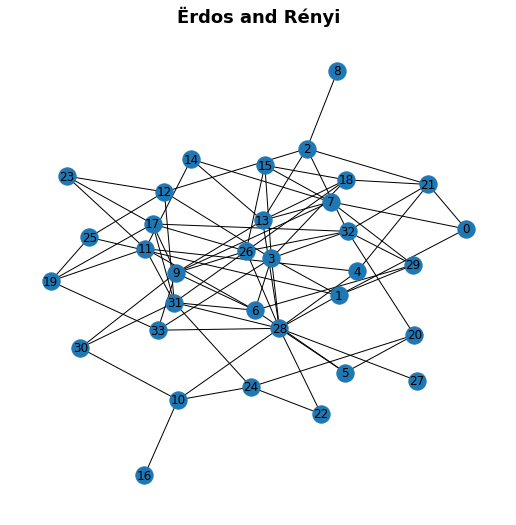

In [6]:
# All networks used

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (9,9))

nx.draw_kamada_kawai(R, ax = ax, with_labels=True)
ax.set_title('Ërdos and Rényi', fontsize= 18, fontweight='bold');

# Save figure
fig.savefig('graphs.png', dtype='png', dpi = 400)

In [7]:
# Calculate the mean (of communicability)
def mean_matrix(matrix):
    matrix_mean = (np.sum(matrix))/(len(matrix)**2)
    return matrix_mean

## The cost of the time (and comparations with other methods in %)

In [8]:
# Calculate the cost
def calc_efficience(G, n):
    # Time
    time_list = []
    cost = []

    # Creating graph matrix adjance
    matrix_adj = create_matrix_adj(G)

    # mean of the communicative matrix
    com_1 = nx_to_np(nx.communicability(G))
    mean_1 = mean_matrix(com_1)

    # mean of the communicative matrix
    com_2 = nx_to_np(nx.communicability_exp(G))
    mean_2 = mean_matrix(com_2)

    # Spectral
    if(n == 1):
        time_start = time.time()
        for i in range(M):
            nx.communicability(G)
        time_end = time.time()
        time_list.append((time_end - time_start)/M)

    # Exponential
    if(n==1):
        time_start = time.time()
        for i in range(M):
            nx.communicability_exp(G)
        time_end = time.time()
        time_list.append((time_end - time_start)/M)

    # Proposed method
    time_start = time.time()
    for i in range(M):
        matrix_c = communicability(matrix_adj,n)    
    time_end = time.time()
    time_list.append((time_end - time_start)/M)


    # Error
    comparation = []
    # Comparation with the spectral
    mean = mean_matrix(matrix_c)
    comparation.append((mean/mean_1) * 100)

    # Comparation with the exponential
    comparation.append((mean/mean_2) * 100)

    cost = [time_list, comparation]
    
    return cost

## Find the k_star

In [9]:
# k_star is the k with property that communicability is 99% compared to other methods
def find_k_star(G):

    matrix_com_1 = nx_to_np(nx.communicability_exp(G))
    matrix_adj = create_matrix_adj(G)
    
    # Mean of communicability matrix
    mean_1 = mean_matrix(matrix_com_1)
    k_star = 0
    cont = 0
    list_comparation = []
    for i in range(1, K+1):
        matrix_com_2 = communicability(matrix_adj, i)
        mean_2 = mean_matrix(matrix_com_2)
        list_comparation.append((mean_2/mean_1)*100)
        if list_comparation[i-1] > equivalence and cont == 0:
            k_star = i
            cont = cont +1
        if i == 20 and k_star == 0 :
            print('\n\n!!!NOT FOUND: k_star\n\n')

    return k_star        

## Data

In [10]:
# Data
data_graphs = {}

data_graphs['Erdos_Renyi'] = R


def cost_for_terms(G):
    cost = []
    for i in range(1, K+1):
        cost.append(calc_efficience(G, i))
    return cost


for i, j in data_graphs.items():
    data_graphs[i] = [j, find_k_star(j), cost_for_terms(j)]


# print(data_graphs)

## Cost of Methods

In [11]:
def print_cost(name, data):
    time_1 = []
    time_2 = []
    time_3 = []
    comparation_1 = []
    comparation_2 = []

    values = data[2]
    
    xt = []
    yt = []
    n = 0
    
    for value in values:
        if(n==0):
            time_1 = [ value[0][0] for i in range(len(values)) ]
            time_2 = [ value[0][1] for i in range(len(values)) ]
        
            time_3.append(value[0][2])
            comparation_1.append(value[1][0])
            comparation_2.append(value[1][1])
        else:
            time_3.append(value[0][0])
            comparation_1.append(value[1][0])
            comparation_2.append(value[1][1])
        n = n + 1

    xt = [ i+1 for i in range(len(comparation_1))]


    # Find k_star
    for i in range(len(comparation_1)):
        if comparation_1[i] > equivalence:
            k_star = i+1
            x = xt[i]
            y = comparation_1[i]
            break


    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True,
                                    figsize=(18, 9))

    # Graphics 1 - Cost of time
    fig.suptitle(name, fontsize=22, fontweight='bold')
    plt.style.use('seaborn')
    ax1.set_title('Custo Computacional - Tempo [s] x Termos [k]', fontsize= 18, fontweight='bold')
    ax1.set_xlabel('k', fontsize=18)
    ax1.set_xticks(xt, fontsize=18)
    ax1.tick_params(labelsize=16)
    ax1.set_yscale('log')


    ax1.plot(xt, time_1, color='b', label='<Método Espectral>')
    ax1.plot(xt, time_2, color='r', label='<Método Exponencial>')
    ax1.scatter(xt, time_3, color='c', label='<Método em série>')
    ax1.set_ylabel('Time [s]', fontsize=18)
    ax1.legend(fontsize=20)


    # Grafico 2 - Comparacao
    ax2.set_title('Relação entre os métodos X Termos [k]', fontsize= 18, fontweight='bold')
    ax2.set_xlabel('k', fontsize=18)
    ax2.set_xticks(xt, fontsize=18)
    ax2.set_ylabel('Porcentagem', fontsize=18)
    ax2.tick_params(labelsize=16)

    ax2.scatter(xt, comparation_1, marker='^', color='k', label='<Método Espectral>')
    ax2.scatter(xt, comparation_2, marker='s', color='c', label='<Método Expenencial>')
    ax2.annotate(f'{comparation_1[k_star]:.1f}%\n k_star: {x}', xy = (x, y), xytext=(12, 60),
            arrowprops = {'facecolor': 'b'}, fontsize=22, color='k', fontweight='bold')
    ax2.legend(fontsize=20);

    # Salvar a imagemq
    fig.savefig(f'comparation_{name}.png', format='png', dpi = 400)

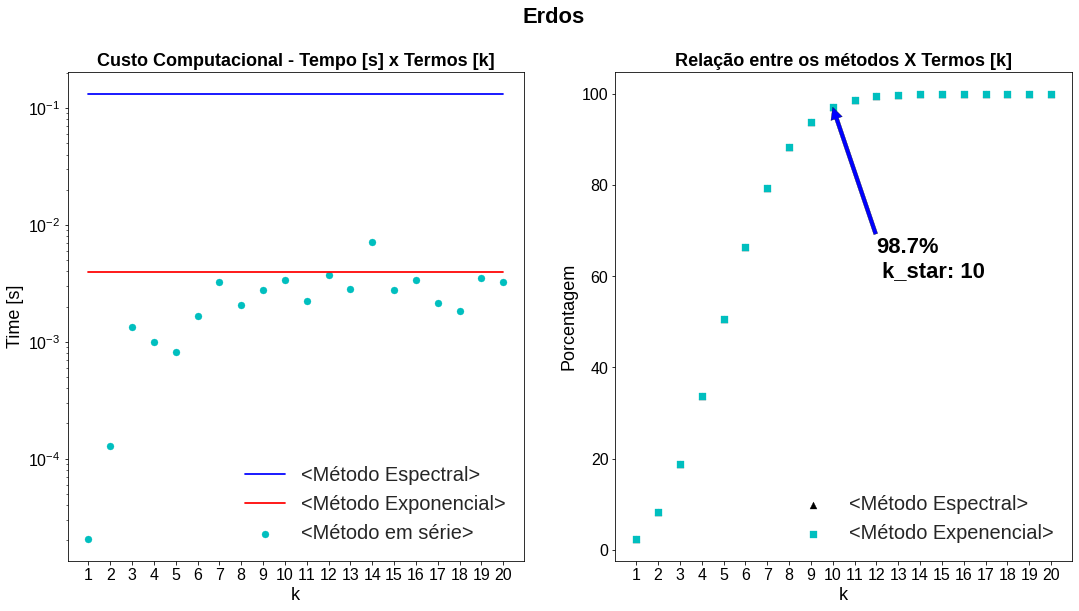

In [12]:
print_cost('Erdos', data_graphs['Erdos_Renyi'])
# print(data_graphs)

## Graphfic cost of time and relation between methods

In [13]:
def verify_velocity():
    time_list_1 = []
    time_list_2 = []
    time_list_3 = []

    comparation_list_1 = []
    comparation_list_2 = []
    comparation_list_3 = []

    for i in range(M):
        G = nx.gnm_random_graph(N, E)


        k_star = find_k_star(G)

        matrix_adj = create_matrix_adj(G)

        for i in range(M):
            time_start = time.time()
            com_1 = nx_to_np(nx.communicability_exp(G))
            time_end = time.time()

            time_list_2.append(time_end - time_start)

        mean_time_2 = (sum(time_list_2)/M)




        for i in range(M):
            time_start = time.time()
            com_1 = nx_to_np(nx.communicability(G))
            time_end = time.time()

            time_list_1.append(time_end - time_start)

        mean_time_1 = (sum(time_list_1)/M)


        time_list = []

        for i in range(M):
            time_start = time.time()
            com_2 = communicability(matrix_adj, k_star)
            time_end = time.time()

            time_list_3.append(time_end - time_start)

        mean_time_3 = (sum(time_list_3)/M)


        comparation_1 = mean_time_1 / mean_time_3
        comparation_list_1.append(comparation_1)

        comparation_2 = mean_time_2 / mean_time_3
        comparation_list_2.append(comparation_2)

        comparation_3 = mean_time_1 / mean_time_2
        comparation_list_3.append(comparation_3)

    mean_comparation_1 = np.mean(comparation_list_1)
    mean_comparation_2 = np.mean(comparation_list_2)
    mean_comparation_3 = np.mean(comparation_list_3)

    print(f'O método em série é em média aproximadamente {mean_comparation_1:.2f}x vezes mais rápido Espectral')
    print(f'O método em série é em média aproximadamente {mean_comparation_2:.2f}x vezes mais rápido Exponencial')
    print(f'O método Exponencial é em média aproximadamente {mean_comparation_3:.2f}x vezes mais rápido Espectral')


In [14]:
verify_velocity()

O método em série é em média aproximadamente 115.25x vezes mais rápido Espectral
O método em série é em média aproximadamente 3.83x vezes mais rápido Exponencial
O método Exponencial é em média aproximadamente 30.44x vezes mais rápido Espectral
